In [1]:
import networkx as nx
import networkx.algorithms.approximation as nxaa
import itertools
import matplotlib.pyplot as plt
from tabulate import tabulate
from time import time

# Independent Set Variant

A variant of the independent set problem is:

**Given a graph G with n vertices, decide if every subgraph of size m contains an independent set of size at least k**

In this notebook, we will provide a simple algorithm for solving this problem and run some tests on our algorithm. We will also test the runtimes of different values of m and k for a various graphs. 

### Our algorithm:

1. Find all subgraphs of size m in a graph G
2. For every subgraph, use networkx's ```maximum_independent_set``` function to find an approximate maximum independent set of that subgraph. If the size of the independent set to see if it is less than k nodes, return FALSE. Otherwise if all maximum independent sets have at least k nodes, return TRUE.

### Runtime Analysis:

- in step 1, note that the number of subgraphs of size m is ${n}\choose{m}$, and this value is largest when $m \approx \frac{n}{2}$. Given that $m \approx \frac{n}{2}$, then ${n}\choose{m}$ = $\frac{n!}{\frac{n}{2}!\frac{n}{2}!} <= 2^n$
- in step 2, the expected runtime ```maximum_independent_set``` is $O(\frac{n}{log^2 n})$
- The total the runtime of this method is $O(2^n * \frac{n}{log^2 n})$

### Code

In [2]:
# Code for our solution

def test(G, m_list, k_list):
    """
    Tests the runtime of our algorithm on a graph with varying m and k parameters
    
    params:
    - G: input graph
    - m_list: list of subgraph sizes to test
    - k_list: list of independent set sizes to test
    """
    
    results = []
    
    test_count = 0
    
    for m in m_list:
        for k in k_list:
            
            # skip if independent set size is graph than subgraph size
            if k > m:
                continue
            
            test_count += 1
            print('Running test {}, m={}, k={}'.format(test_count, m, k))
            
            # begin timer
            start_time = time()
            
            # create all subgraphs of size m
            subgraphs = make_subgraphs(G, m)
            
            # check if all subgraphs have an independent set of size at least k
            decision = solve_subgraphs(subgraphs, k)
            
            # end timer
            end_time = time()
            
            results.append([m, len(subgraphs), k, decision, round(end_time-start_time, 2)])
            
    # print the results
    print()
    print(tabulate(results, headers=['m (subgraph size)', '# of subgraphs', 'k (indep set size)', 'decision', 'elapsed time (sec)']))
    
def solve_subgraphs(subgraphs, k):
    """
    Returns True if all subgraphs have independent size at least k and False otherwise
    
    params:
    - subgraphs: list of subgraphs
    - k: (int) independent set size
    
    returns:
    - (bool) True or False
    """
    
    for S in subgraphs:
        iset = nxaa.maximum_independent_set(S) # find the maximum independent set
        if len(iset) < k:
            return False
    return True

def make_subgraphs(G, m):
    """
    Given a graph and an integer m, find all subgraphs of size m
    
    params:
    - G: input graph
    - m: (int) subgraph size
    
    returns:
    - list of all subgraphs of size m
    """
    
    # get all nodes in each subgraph
    subgraph_nodes = list(itertools.combinations(list(G.nodes), m))
    
    # create the subgraphs
    subgraphs = []
    for nodes in subgraph_nodes:
        S =  G.subgraph(nodes)
        subgraphs.append(S)
        
    return subgraphs

### Tests

C:\Users\cathy\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


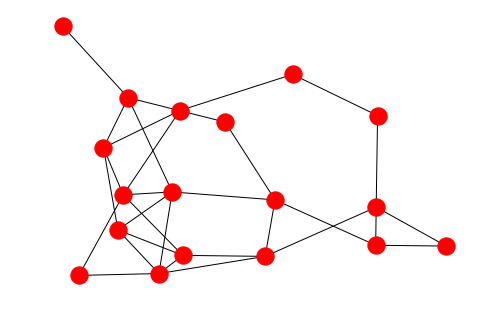

In [3]:
# Generate a random graph
n_nodes = 18  # number of nodes
n_edges = 30  # number of edges
G = nx.dense_gnm_random_graph(n_nodes, n_edges)

# Plot the graph
nx.draw(G)
plt.show()

In [4]:
# Test runtimes of different m and k values
m_list = [1, 2, 4, 5, 8, 9, 10, 12, 14, 16, 18]
k_list = [1, 2, 4, 5, 8, 9, 10, 12, 14, 16, 18]
test(G, m_list, k_list)

Running test 1, m=1, k=1
Running test 2, m=2, k=1
Running test 3, m=2, k=2
Running test 4, m=4, k=1
Running test 5, m=4, k=2
Running test 6, m=4, k=4
Running test 7, m=5, k=1
Running test 8, m=5, k=2
Running test 9, m=5, k=4
Running test 10, m=5, k=5
Running test 11, m=8, k=1
Running test 12, m=8, k=2
Running test 13, m=8, k=4
Running test 14, m=8, k=5
Running test 15, m=8, k=8
Running test 16, m=9, k=1
Running test 17, m=9, k=2
Running test 18, m=9, k=4
Running test 19, m=9, k=5
Running test 20, m=9, k=8
Running test 21, m=9, k=9
Running test 22, m=10, k=1
Running test 23, m=10, k=2
Running test 24, m=10, k=4
Running test 25, m=10, k=5
Running test 26, m=10, k=8
Running test 27, m=10, k=9
Running test 28, m=10, k=10
Running test 29, m=12, k=1
Running test 30, m=12, k=2
Running test 31, m=12, k=4
Running test 32, m=12, k=5
Running test 33, m=12, k=8
Running test 34, m=12, k=9
Running test 35, m=12, k=10
Running test 36, m=12, k=12
Running test 37, m=14, k=1
Running test 38, m=14, k=2
R